In [45]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os#Q2
import statsmodels.api as sm
import warnings


warnings.filterwarnings("ignore")

plt.style.use('fivethirtyeight')

# Q2

In [134]:
# Configure API key 
quandl.ApiConfig.api_key = 'tytCADzV_gMqHDzgvab2'

In [135]:
# Importing United Kingdom Population, Millions
data = quandl.get('ODA/GBR_LP')

In [136]:
# Data wrangling & cleaning

In [137]:
data.head()

,Value
Date,
1980-12-31,56.330
1981-12-31,56.358
1982-12-31,56.291
1983-12-31,56.316
1984-12-31,56.409


In [50]:
data.tail()

,Value
Date,
2020-12-31,67.255
2021-12-31,67.612
2022-12-31,67.949
2023-12-31,68.266
2024-12-31,68.572


In [ ]:
#subsetting

In [178]:
data_2 = data.reset_index()

In [179]:
data_sub = data_2.loc[(data_2['Date'] >= '1980-01-01') & (data_2['Date'] < '2020-06-01')]

In [180]:
data_sub['datetime'] = pd.to_datetime(data_sub['Date']) # create a datetime column from 'Date
data_sub = data_sub.set_index('datetime') # set the datetime as the index of the dataframe
data_sub.drop(['Date'], axis=1, inplace=True) # drop the 'Date'

data_sub.head()

,Value
datetime,
1980-12-31,56.330
1981-12-31,56.358
1982-12-31,56.291
1983-12-31,56.316
1984-12-31,56.409


In [181]:
data_sub.shape

(40, 1)

In [183]:
data_sub.columns

Index(['Value'], dtype='object')

In [ ]:
# duplicates check as part of consistency checks

In [184]:
dups = data_sub.duplicated()
dups.sum()

0

In [ ]:
#checking for null values as part of consistency checks

In [185]:

data_sub.isnull().sum() 

Value    0
dtype: int64

# Q4

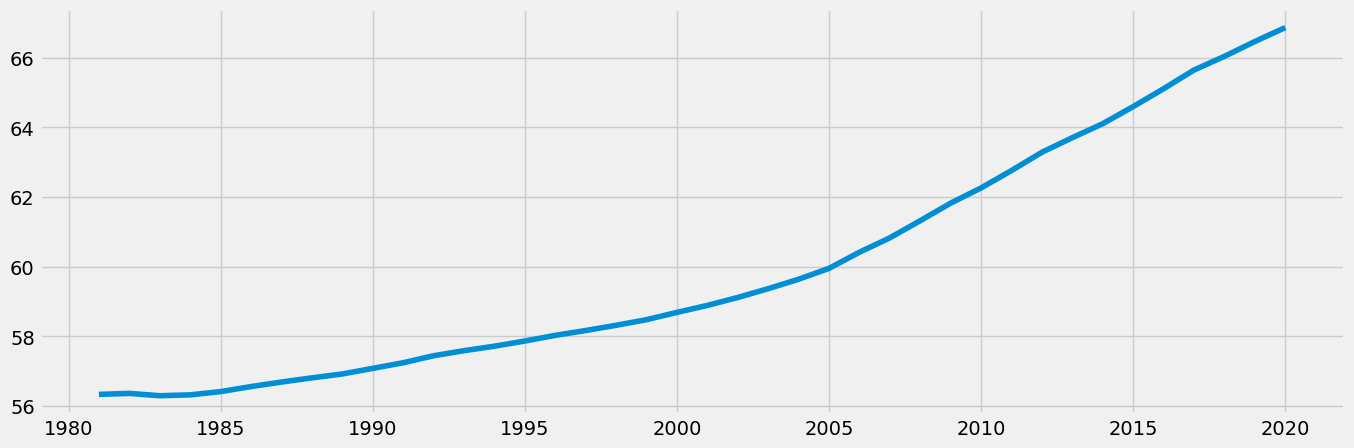

In [186]:
plt.figure(figsize=(15,5), dpi=100) 

plt.plot(data_sub)

# Q5

In [187]:

decomposition = sm.tsa.seasonal_decompose(data_sub, model='additive')

In [188]:
from pylab import rcParams

rcParams['figure.figsize'] = 18, 7

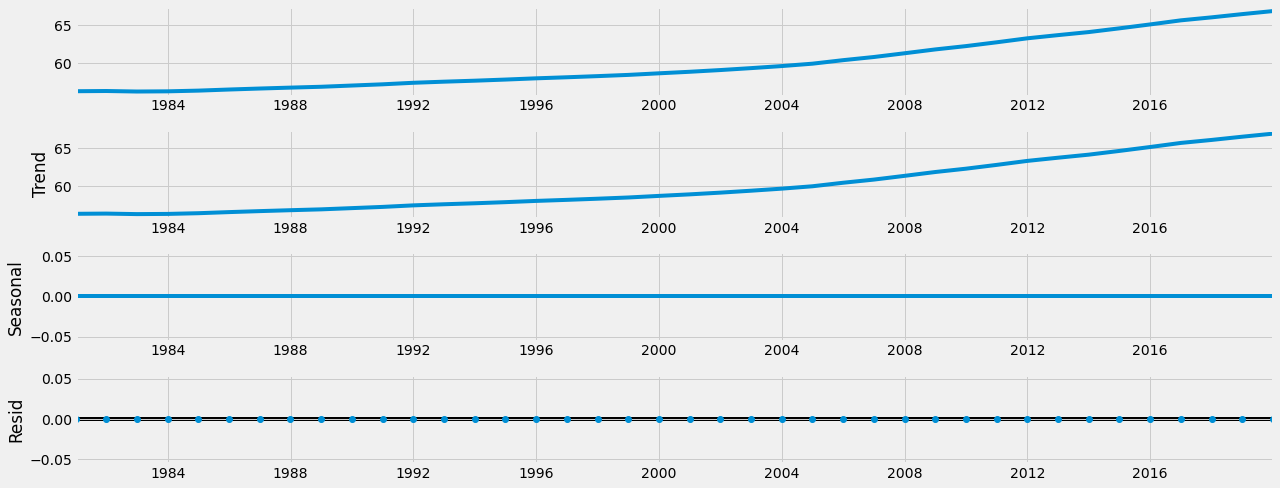

In [189]:
decomposition.plot()
plt.show()

# - The chart shows an upward trend in a time series which indicates non-stationary data, and not ideal for time-series analysis. The Mean is increasing each year. This is likely due to a number of socio-economic factors that have resulted in an increase in UK population over the years. The 'seasonal' would not apply to this chart as population increase isn't considered a seasonal factor, and so we can safely remain comfortable in what's being shown in the chart

# Q6 - Stationarity Test

In [ ]:
# Dickey-Fuller Test

In [190]:


from statsmodels.tsa.stattools import adfuller

def dickey_fuller(timeseries): 
   
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)


dickey_fuller(data_sub['Value'])

Dickey-Fuller Stationarity test:
Test Statistic                  0.697295
p-value                         0.989784
Number of Lags Used             1.000000
Number of Observations Used    38.000000
Critical Value (1%)            -3.615509
Critical Value (5%)            -2.941262
Critical Value (10%)           -2.609200
dtype: float64


# The data set above shows a larger Test-Stastic than both critical values and so another round of differencing will be carried out.

In [107]:
#auto-correlaions check

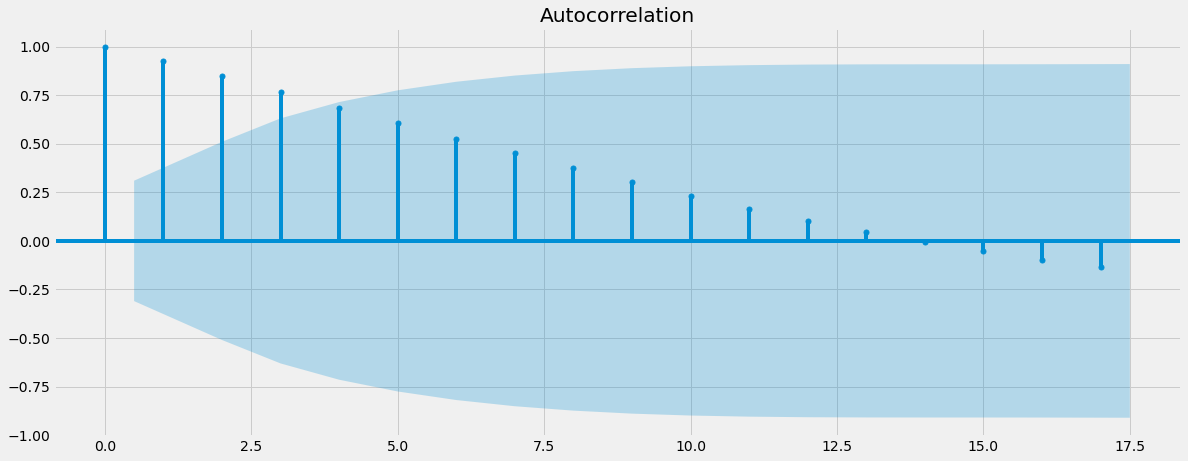

In [191]:


from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(data_sub)
plt.show()

In [118]:
# Stationarizing the data

In [192]:
data_diff = data_sub - data_sub.shift(1)

In [193]:
data_diff.dropna(inplace = True) 

In [194]:
data_diff.head()

,Value
datetime,
1981-12-31,0.028
1982-12-31,-0.067
1983-12-31,0.025
1984-12-31,0.093
1985-12-31,0.145


In [129]:
# After performing differencing

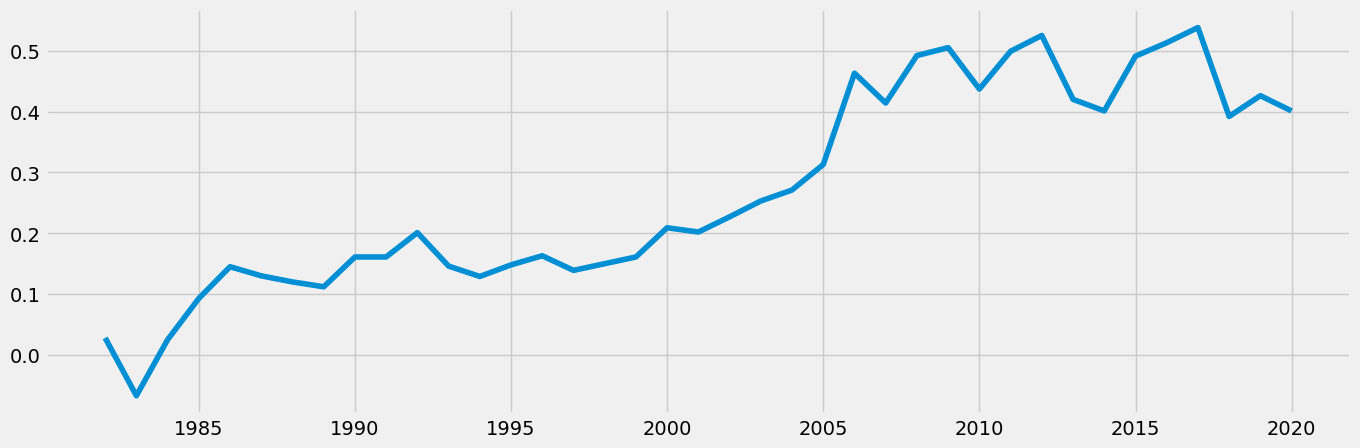

In [195]:
plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [224]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                 -1.406295
p-value                         0.579255
Number of Lags Used             0.000000
Number of Observations Used    38.000000
Critical Value (1%)            -3.615509
Critical Value (5%)            -2.941262
Critical Value (10%)           -2.609200
dtype: float64


In [223]:
 # The test statistic has dropped, but it's still only marginally higher than the Critical values. There has been a change to the p-value. 

# Second Round of Differencing

In [ ]:
# the null hypothesis can be rejected now with a much higher Test statstic than both critical Values. The test also shows a strong P-value of 1.

In [225]:
data_diff = data_sub-data_sub.shift(1)

In [226]:
data_diff.dropna(inplace = True) 

In [227]:
data_diff.head()

,Value
datetime,
1981-12-31,0.028
1982-12-31,-0.067
1983-12-31,0.025
1984-12-31,0.093
1985-12-31,0.145


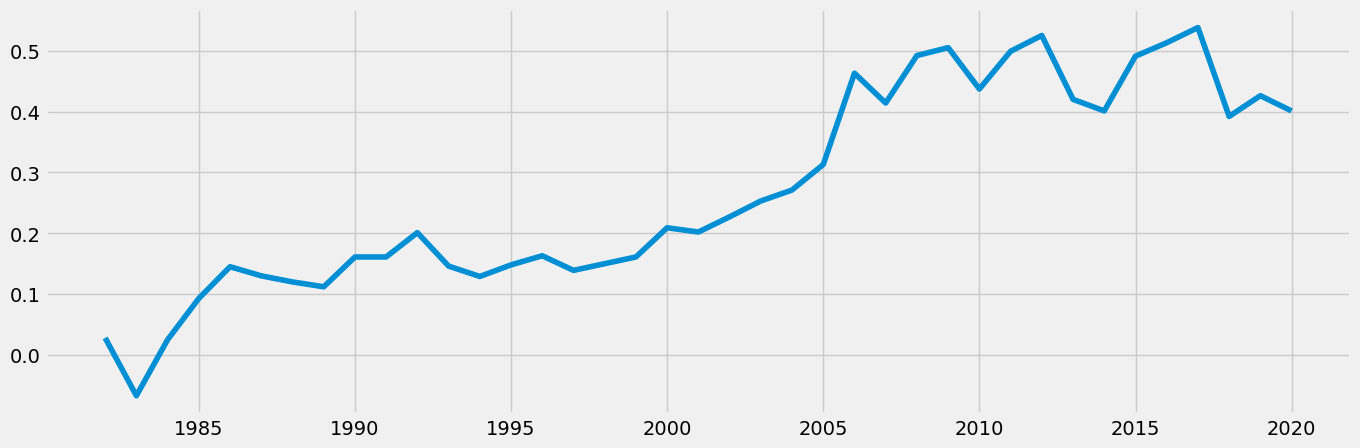

In [228]:
plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [229]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                 -1.406295
p-value                         0.579255
Number of Lags Used             0.000000
Number of Observations Used    38.000000
Critical Value (1%)            -3.615509
Critical Value (5%)            -2.941262
Critical Value (10%)           -2.609200
dtype: float64


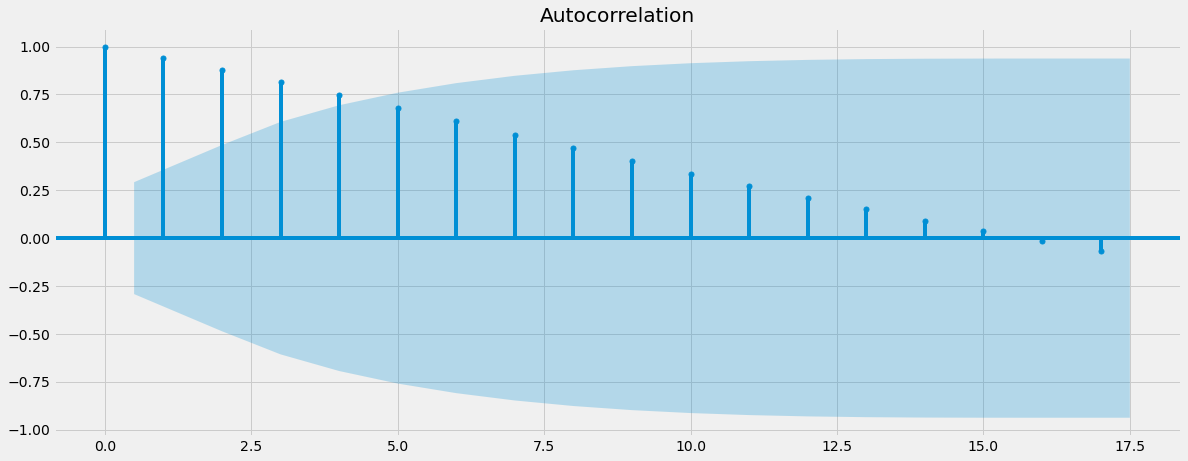

In [160]:


from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(data)
plt.show()

# Conclusion

# Conlusion The null hbypothesis can not be rejected and the series is not stationary, due to a slightly larger 'Test Statistic' The test result is however significant as the p-value is less than 0.05.